# PC Algorithm

## Library imports

In [4]:
# Install statements

# install.packages(c("remotes","pROC","naivebayes"))
# remotes::install_github("jtextor/bayesianNetworks")
# install.packages("bnlearn")
# install.packages("dagitty")
# install.packages("lavaan")

In [5]:
# Packages

library( bayesianNetworks )
library( naivebayes )
library( bnlearn )
library( dagitty )
library( lavaan )

Warning message:
"package 'naivebayes' was built under R version 3.6.3"naivebayes 0.9.7 loaded
Warning message:
"package 'bnlearn' was built under R version 3.6.3"Warning message:
"package 'dagitty' was built under R version 3.6.3"
Attaching package: 'dagitty'

The following objects are masked from 'package:bnlearn':

    ancestors, children, descendants, parents, spouses

Warning message:
"package 'lavaan' was built under R version 3.6.3"This is lavaan 0.6-7
lavaan is BETA software! Please report any bugs.


## Data Preprocessing

In [6]:
# Read in the .csv that was created during the preprocessing

df <- read.csv('Datasets/Dataset_Coeff_Estimation.csv')

# Visually inspect the dataframe

head(df)

Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation_seeking,Caffeine,Cannabis,Meth
35-44,0,Professional certificate/ diploma,39,36,42,37,42,-0.21712,-1.18084,6,0,0
25-34,1,Doctorate degree,29,52,55,48,41,-0.71126,-0.21575,6,4,3
35-44,1,Professional certificate/ diploma,31,45,40,32,34,-1.37983,0.40148,6,3,0
18-24,0,Masters degree,34,34,46,47,46,-1.37983,-1.18084,5,2,0
35-44,0,Doctorate degree,43,28,43,41,50,-0.21712,-0.21575,6,3,0
65+,0,Left school at 18,29,38,35,55,52,-1.37983,-1.54858,6,0,0


In [7]:
# After experimentation with and without ordering the class labels,
# We decided to order them because this resulted in more expressive path coefficients

df$Caffeine <- ordered(df$Caffeine, levels =c("0","1","2","3","4","5","6"))
df$Cannabis <- ordered(df$Cannabis, levels =c("0","1","2","3","4","5","6"))
df$Meth <- ordered(df$Meth, levels =c("0","1","2","3","4","5","6"))

# Age and Education have a certain ordinal ordering which we will make use of:

df$Age <- ordered(df$Age, levels =c("18-24","25-34","35-44","45-54","55-64","65+"))
df$Education <- ordered(df$Education, levels=c("Left school before 16","Left school at 16","Left school at 17","Left school at 18","College or university dropout","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"))

In [8]:
# Inspecting the datatypes present in the dataframe

print("Train dataset specifications:")
str(df)

[1] "Train dataset specifications:"
'data.frame':	1885 obs. of  13 variables:
 $ Age              : Ord.factor w/ 6 levels "18-24"<"25-34"<..: 3 2 3 1 3 6 4 3 3 5 ...
 $ Gender           : int  0 1 1 0 0 0 1 1 0 1 ...
 $ Education        : Ord.factor w/ 9 levels "Left school before 16"<..: 6 9 6 8 9 4 8 2 6 8 ...
 $ Nscore           : num  39 29 31 34 43 29 31 24 42 33 ...
 $ Escore           : num  36 52 45 34 28 38 32 52 55 40 ...
 $ Oscore           : num  42 55 40 46 43 35 43 40 39 36 ...
 $ Ascore           : num  37 48 32 47 41 55 41 41 48 47 ...
 $ Cscore           : num  42 41 34 46 50 52 48 52 49 43 ...
 $ Impulsive        : num  -0.217 -0.711 -1.38 -1.38 -0.217 ...
 $ Sensation_seeking: num  -1.181 -0.216 0.401 -1.181 -0.216 ...
 $ Caffeine         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 7 7 7 6 7 7 7 7 7 7 ...
 $ Cannabis         : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 5 4 3 4 1 2 1 1 2 ...
 $ Meth             : Ord.factor w/ 7 levels "0"<"1"<"2"<"3"<..: 1 4 1 1 

In [9]:
# Apparently doubles are the new big happy

df$Gender <- as.double(df$Gender) 
df$Nscore <- as.double(df$Nscore) 
df$Escore <- as.double(df$Escore) 
df$Oscore <- as.double(df$Oscore) 
df$Ascore <- as.double(df$Ascore) 
df$Cscore <- as.double(df$Cscore) 

## Model creation

Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Nscore -> Escore <- Sensation_seeking is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Gender -> Nscore <- Escore is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Gender -> Sensation_seeking <- Escore is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Cscore -> Gender <- Sensation_seeking is not applicable, because one or both arcs are oriented in the opposite direction."Warning message in vstruct.apply(arcs = arcs, vs = vs, nodes = nodes, debug = debug):
"vstructure Cscore -> Escore <- Sensation_see


  Bayesian network learned via Constraint-based methods

  model:
    [partially directed graph]
  nodes:                                 13 
  arcs:                                  17 
    undirected arcs:                     4 
    directed arcs:                       13 
  average markov blanket size:           3.69 
  average neighbourhood size:            2.62 
  average branching factor:              1.00 

  learning algorithm:                    PC (Stable) 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  758 


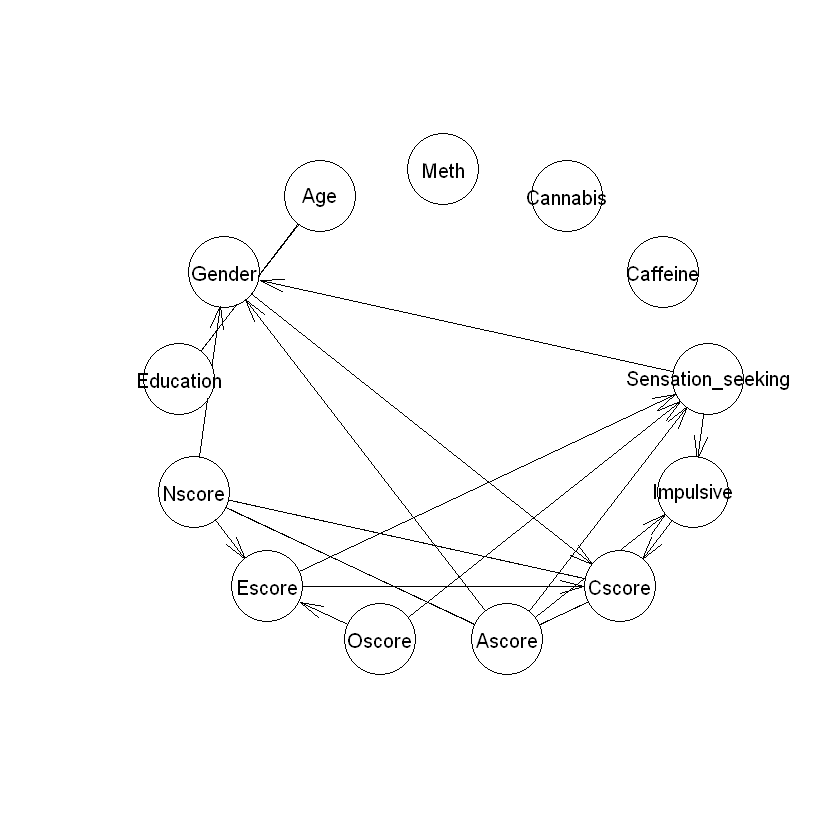

In [21]:
# The independence-test that was used is "Mutual Information" since it is the only (implemented) test 
# that supports hybrid Bayesian networks

unconstrained_fit <- pc.stable(df,undirected=FALSE,alpha=0.05,test="mi-cg")
plot(unconstrained_fit)
unconstrained_fit

# As we can observe from the results there are still undirected edges which can occur 
# because some arc directions are impossible to learn just from data due to score equivalence 

# Without blacklisted relations, there are some things here that are looking a bit off 
# Nothing should be able to influence Age or gender


  Bayesian network learned via Constraint-based methods

  model:
   [Age][Gender][Escore][Oscore][Caffeine][Meth][Education|Age][Nscore|Gender]
   [Ascore|Gender][Cscore|Gender][Impulsive|Ascore:Cscore]
   [Cannabis|Age:Education]
   [Sensation_seeking|Gender:Escore:Oscore:Ascore:Impulsive]
  nodes:                                 13 
  arcs:                                  13 
    undirected arcs:                     0 
    directed arcs:                       13 
  average markov blanket size:           3.38 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  learning algorithm:                    PC (Stable) 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  320 


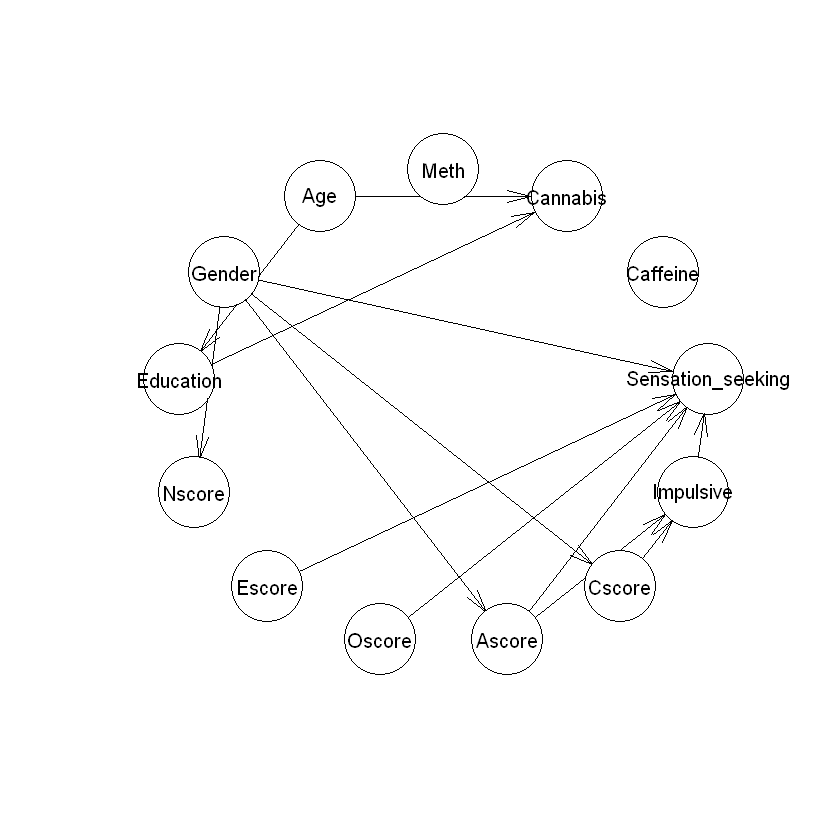

In [30]:
# If we make the same assumptions about our data as done in assignment 1 we get the following blacklist:

blacklist <- data.frame(
  "from" = c(
             rep("Escore",6), #1
             rep("Oscore",6), #2
             rep("Ascore",6), #3
             rep("Cscore",6), #4
             rep("Nscore",6), #5
             rep("Sensation_seeking",8), #6
             rep("Impulsive",7), #7
             rep("Education",9), #8
             rep("Caffeine",12), #9
             rep("Cannabis",12), #10
             rep("Meth",12) #11

             ),
  "to" = c(
           "Oscore", "Ascore", "Cscore","Nscore", "Age", "Gender", #Escore
           "Escore", "Ascore", "Cscore","Nscore", "Age", "Gender", #Oscore
           "Escore","Oscore","Cscore","Nscore", "Age", "Gender", #Ascore
           "Escore","Oscore","Ascore","Nscore", "Age", "Gender", #Cscore
           "Oscore","Ascore","Cscore","Escore", "Age", "Gender", #Nscore
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Impulsive", #Sensation_seeking
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", #Impulsive
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", #Education
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", "Education", "Cannabis", "Meth", #Caffeine
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", "Education", "Caffeine", "Meth", #Cannabis
           "Oscore","Ascore","Cscore","Escore", "Nscore", "Age", "Gender", "Sensation_seeking", "Impulsive", "Education", "Cannabis", "Caffeine" #Meth
           ))

# If we now use the created blacklist from the cell above we get the following learned network structure

fit_constraint_based <- pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=0.05,test="mi-cg")
plot(fit_constraint_based)
fit_constraint_based

# The network seems to contain no directed edges anymore

## Parameter Tuning


  Bayesian network learned via Constraint-based methods

  model:
   [Age][Gender][Nscore][Escore][Oscore][Caffeine][Meth][Education|Age]
   [Ascore|Gender][Cscore|Gender][Impulsive|Ascore:Cscore]
   [Cannabis|Age:Education][Sensation_seeking|Gender:Escore:Oscore:Impulsive]
  nodes:                                 13 
  arcs:                                  11 
    undirected arcs:                     0 
    directed arcs:                       11 
  average markov blanket size:           2.77 
  average neighbourhood size:            1.69 
  average branching factor:              0.85 

  learning algorithm:                    PC (Stable) 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.001 
  tests used in the learning procedure:  233 


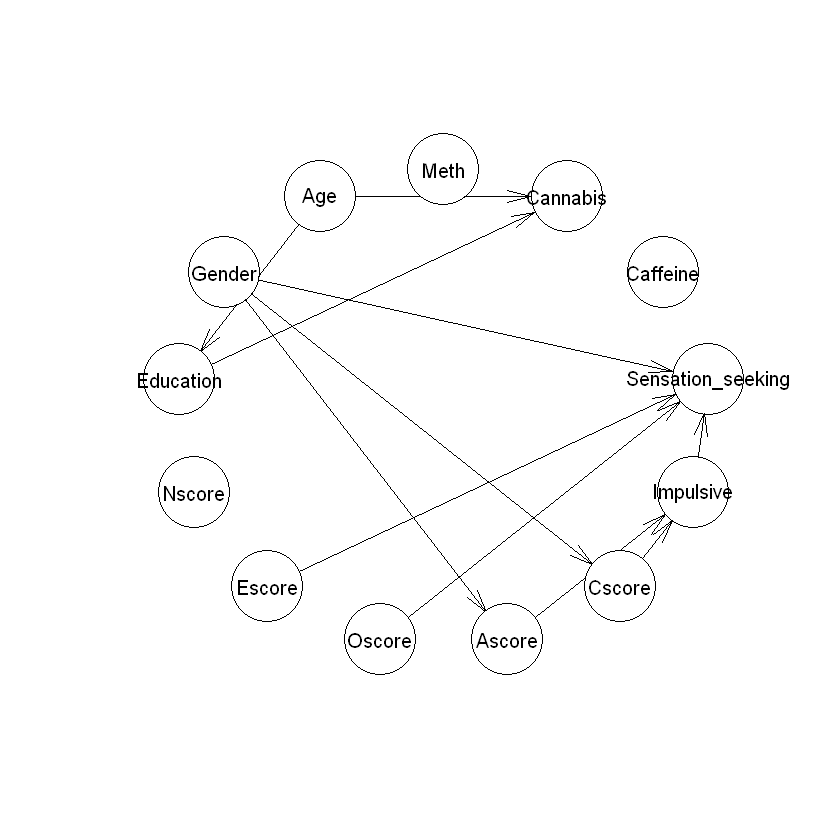


  Bayesian network learned via Constraint-based methods

  model:
   [Age][Gender][Escore][Oscore][Caffeine][Meth][Education|Age][Nscore|Gender]
   [Ascore|Gender][Cscore|Gender][Impulsive|Ascore:Cscore]
   [Cannabis|Age:Education]
   [Sensation_seeking|Gender:Escore:Oscore:Ascore:Impulsive]
  nodes:                                 13 
  arcs:                                  13 
    undirected arcs:                     0 
    directed arcs:                       13 
  average markov blanket size:           3.38 
  average neighbourhood size:            2.00 
  average branching factor:              1.00 

  learning algorithm:                    PC (Stable) 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.05 
  tests used in the learning procedure:  320 


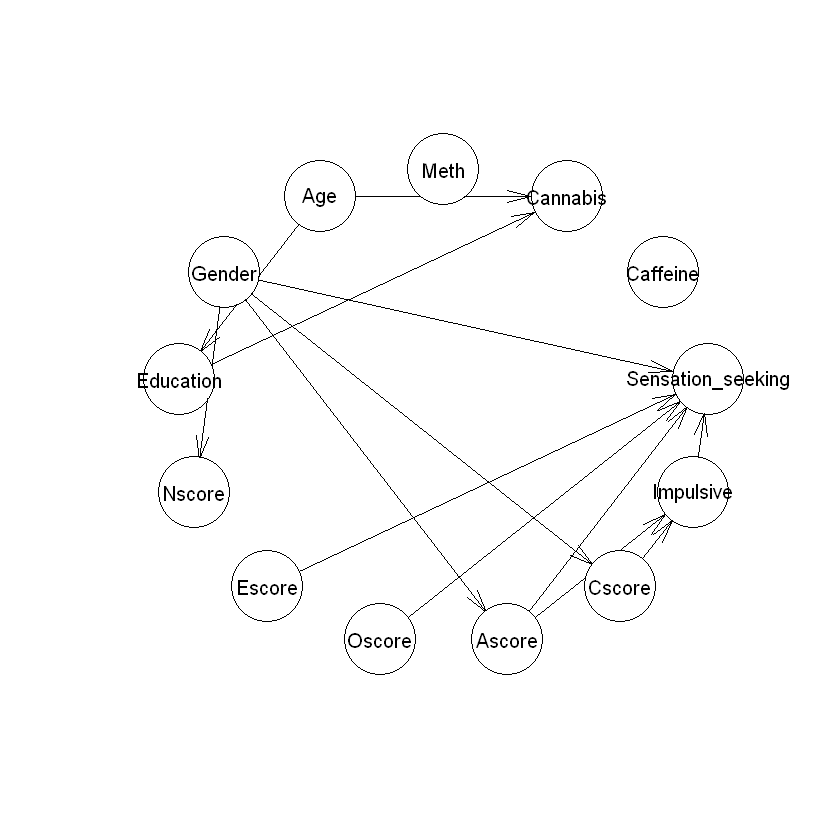


  Bayesian network learned via Constraint-based methods

  model:
   [Age][Gender][Nscore][Escore][Oscore][Caffeine][Meth][Education|Age]
   [Ascore|Gender][Cscore|Gender][Impulsive|Ascore:Cscore]
   [Cannabis|Age:Education][Sensation_seeking|Gender:Escore:Oscore:Impulsive]
  nodes:                                 13 
  arcs:                                  11 
    undirected arcs:                     0 
    directed arcs:                       11 
  average markov blanket size:           2.77 
  average neighbourhood size:            1.69 
  average branching factor:              0.85 

  learning algorithm:                    PC (Stable) 
  conditional independence test:         Mutual Information (cond. Gauss.) 
  alpha threshold:                       0.01 
  tests used in the learning procedure:  260 


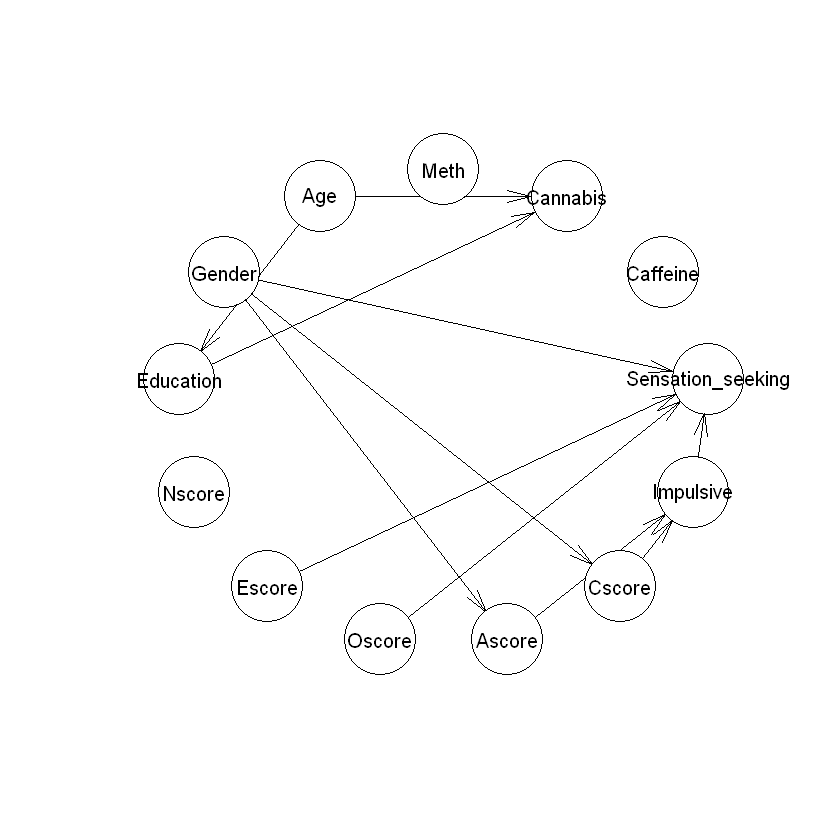

In [34]:
# Now let's tune a parameter: Alpha

# Alpha 0.1
fit_constraint_based_a0.1 <- pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=0.1,test="mi-cg")
plot(fit_constraint_based_a0.1)
fit_constraint_based_a0.1

# Alpha 0.05
fit_constraint_based_a0.05 <- pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=0.05,test="mi-cg")
plot(fit_constraint_based_a0.05)
fit_constraint_based_a0.05

# Alpha 0.01
fit_constraint_based_a0.01 <- pc.stable(df, blacklist = blacklist,undirected=FALSE,alpha=0.01,test="mi-cg")
plot(fit_constraint_based_a0.01)
fit_constraint_based_a0.01

## Score testing / Model comparison

In [33]:
# Let's compare them using the BIC score

print("BIC: Alpha 0.001")

score(fit_constraint_based_a0.1, df)

print("BIC: Alpha 0.05")

score(fit_constraint_based_a0.05, df)

print("BIC: Alpha 0.01")

score(fit_constraint_based_a0.01, df)

[1] "BIC: Alpha 0.1"


[1] -51738.85

[1] "BIC: Alpha 0.05"


[1] -51738.85

[1] "BIC: Alpha 0.01"


[1] -51751.15

## Path Coefficients

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.


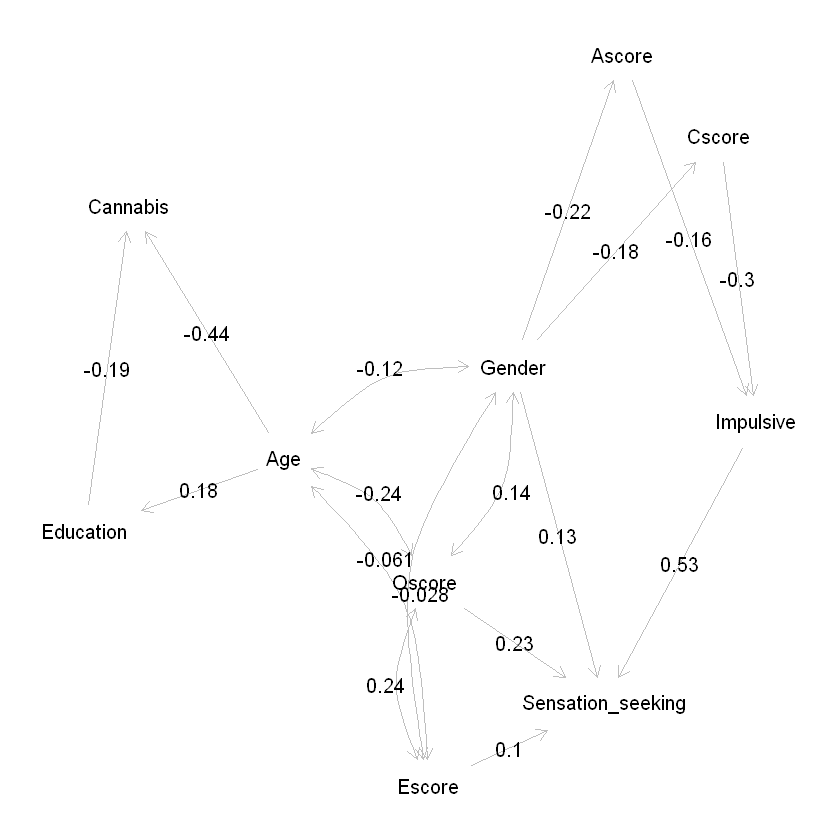

In [35]:
# This dagitty formatted string is obtained through a seperate Python parser (see the readme)
string_alpha0.1_and_0.05 = "dag { Age Gender Nscore Escore Oscore Caffeine Meth Education Ascore Cscore Impulsive Cannabis Sensation_seeking Age -> Education Gender -> Ascore Gender -> Cscore Ascore -> Impulsive Cscore -> Impulsive Age -> Cannabis Education -> Cannabis Gender -> Sensation_seeking Escore -> Sensation_seeking Oscore -> Sensation_seeking Impulsive -> Sensation_seeking }"
g1 = dagitty(string_alpha0.1_and_0.05)

# Create correlation matrix using lavaan to calculate the path coefficients
M <- lavCor(df)
model1 <- toString(g1,"lavaan")
msem <- lavaan(model1, sample.cov=M, sample.nobs=nrow(df),estimator="ML", auto.var=TRUE, fixed.x = FALSE)
fg <- lavaanToGraph(msem, digits = 2)
plot(fg, show.coefficients = TRUE)

Plot coordinates for graph not supplied! Generating coordinates, see ?coordinates for how to set your own.


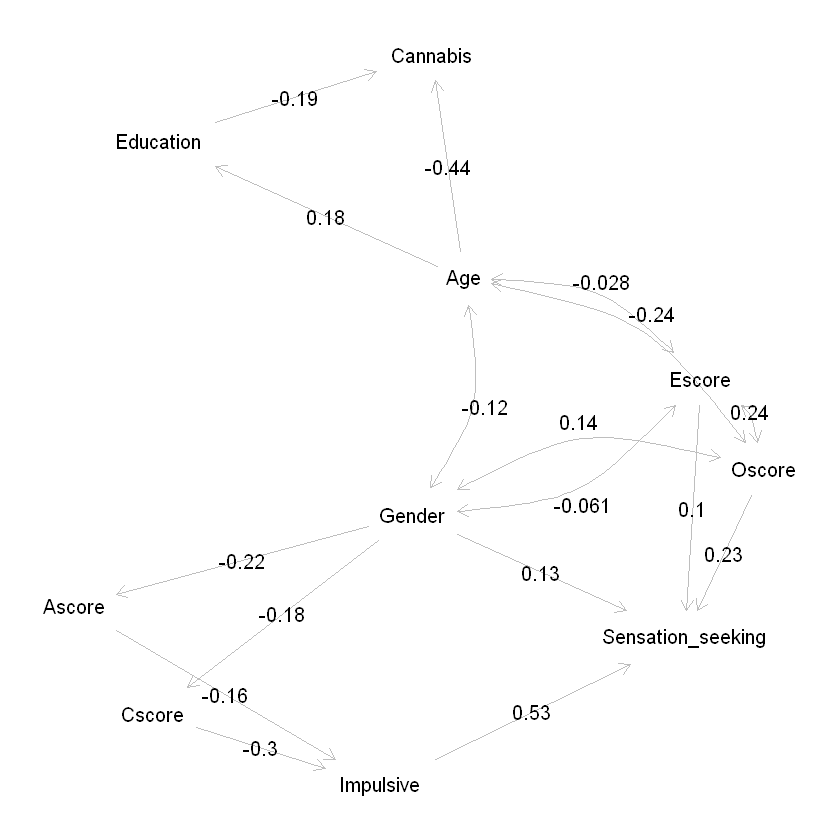

In [36]:
# This dagitty formatted string is obtained through a seperate Python parser (see the readme)
string_alpha0.01 = "dag { Age Gender Nscore Escore Oscore Caffeine Meth Education Ascore Cscore Impulsive Cannabis Sensation_seeking Age -> Education Gender -> Ascore Gender -> Cscore Ascore -> Impulsive Cscore -> Impulsive Age -> Cannabis Education -> Cannabis Gender -> Sensation_seeking Escore -> Sensation_seeking Oscore -> Sensation_seeking Impulsive -> Sensation_seeking }"
g2 = dagitty(string_alpha0.01)

# Create correlation matrix using lavaan to calculate the path coefficients
M <- lavCor(df)
model1 <- toString(g2,"lavaan")
msem <- lavaan(model1, sample.cov=M, sample.nobs=nrow(df),estimator="ML", auto.var=TRUE, fixed.x = FALSE)
fg <- lavaanToGraph(msem, digits = 2)
plot(fg, show.coefficients = TRUE)